In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns




In [3]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\MCR_CtrlvTrt\\Orth_Scores_Summary.xlsx', sheet_name = "Sheet1")
df.head()

,Label,sample,trt_time,orient,spectra_num,details,Class,Scores on Comp 2 (28.32%)
0,20250616,Ctrl,20mins,Orth,1,0616-Ctrl-20mins-Orth,20mins,0.292492
1,20250616,Ctrl,20mins,Orth,2,0616-Ctrl-20mins-Orth,20mins,0.240880
2,20250616,Ctrl,20mins,Orth,3,0616-Ctrl-20mins-Orth,20mins,0.099573
3,20250616,Ctrl,20mins,Orth,4,0616-Ctrl-20mins-Orth,20mins,0.211393
4,20250616,Ctrl,20mins,Orth,5,0616-Ctrl-20mins-Orth,20mins,0.130145


In [9]:

data = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 2 (28.32%)'])[1]}")
    tukey = pairwise_tukeyhsd(endog=dff['Scores on Comp 2 (28.32%)'],
                            groups=dff['sample'],
                            alpha=0.05)
    #display results
    #print(f"Results for {x}")
    #print(tukey)
    #print('*****************************************************')
    data.append(pd.DataFrame(tukey.summary().data[1:], columns = tukey.summary().data[0]))

0.420772026589479
0.47409289069052357
0.10968271378341315
0.002739353211329695
1.712613482577515e-06


In [13]:
dff['Scores on Comp 2 (28.32%)']#[1]

6      0.366173
7      0.264996
8      0.359548
9      0.480105
10     0.290334
         ...   
434    0.359757
435    0.271130
436    0.213802
437    0.225338
438    0.159394
Name: Scores on Comp 2 (28.32%), Length: 190, dtype: float64

In [10]:
stat_results = pd.concat(data).reset_index(drop=True).iloc[:13, :]
stat_results.insert(7, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in stat_results['p-adj']])
stat_results#.head()

,group1,group2,meandiff,p-adj,lower,upper,reject,sig
0,Ctrl,Trt,0.1069,0.0003,0.0440,0.1697,True,**
1,Ctrl,Trt_24h,0.0829,0.0068,0.0196,0.1463,True,**
2,Trt,Trt_24h,-0.0239,0.6463,-0.0878,0.0399,False,ns
3,Ctrl,Trt,0.1374,0.0000,0.0750,0.1998,True,**
4,Ctrl,Trt_24h,0.1318,0.0000,0.0703,0.1933,True,**
5,Trt,Trt_24h,-0.0056,0.9738,-0.0666,0.0554,False,ns
6,Ctrl,Trt,0.0986,0.0026,0.0300,0.1671,True,**
7,Ctrl,Trt_24h,0.1272,0.0001,0.0587,0.1958,True,**
8,Trt,Trt_24h,0.0287,0.5758,-0.0393,0.0967,False,ns
9,Ctrl,Trt,0.1698,0.0000,0.1144,0.2251,True,**


In [14]:
df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20mins24h',
       '2mins24h', '40mins24h', '60mins24h'], dtype=object)

<Axes: xlabel='trt_time', ylabel='Scores on Comp 2 (28.32%)'>

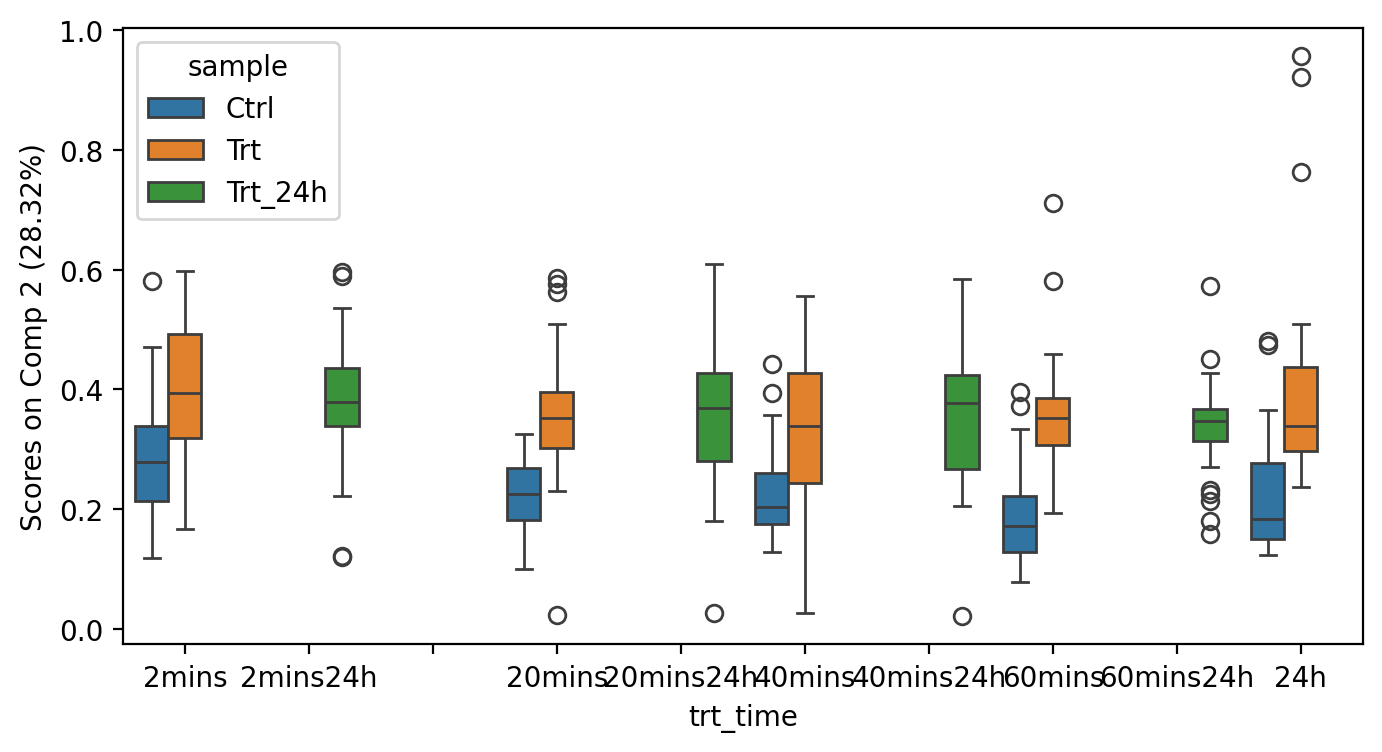

In [ ]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(
    x = 'trt_time',
    y = 'Scores on Comp 2 (28.32%)',
    data = df,
    hue = 'sample',
    order = ['2mins', '2mins24h', ' ', '20mins', '20mins24h', ' ', '40mins', '40mins24h', ' ', '60mins', 
       '60mins24h',' ', '24h']
)
plt